**First let's handle the 2D case:**

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import matplotlib.animation as animation
import math as m
from IPython.display import Image

Here we define the curve. We will iterate threw this curve


In [14]:
# Define the symbolic variable t
t = sp.symbols('t')

In [15]:
# Define the parametric equations X = (x1(t),x2(t))
x = t
y = t**2

In [35]:
x = t - sp.sin(t)
y = 1 - sp.cos(t)

Visualisation of the curve.

In [36]:
# Convert symbolic expressions to numerical functions for plotting
x_func = sp.lambdify(t, x, 'numpy')
y_func = sp.lambdify(t, y, 'numpy')

# Define the range for t
t_values = np.linspace(-10, 10, 400)

In [38]:
# Compute the values for x, y, x', and y'
x_values = x_func(t_values)
y_values = y_func(t_values)

In [39]:
# Compute first derivatives
x_prime = sp.diff(x, t)
y_prime = sp.diff(y, t)

# Compute second derivatives
x_double_prime = sp.diff(x_prime, t)
y_double_prime = sp.diff(y_prime, t)

In [40]:
#Check for zero division
# Compute the numerator and denominator for the curvature k(t)
numerator_k = sp.Abs(x_prime * y_double_prime - y_prime * x_double_prime)
denominator_k = (x_prime**2 + y_prime**2)**(3/2)

# Check if the denominator is zero to avoid division by zero
if denominator_k == 0:
    k = sp.nan  # Curvature is undefined
    R = sp.nan  # Radius of curvature is undefined
else:
    k = numerator_k / denominator_k  # Curvature k(t)
    R = 1 / k  # Radius of curvature R(t)

# Compute the unit tangent vector T(t)
magnitude_X_prime = sp.sqrt(x_prime**2 + y_prime**2)
T_x = x_prime / magnitude_X_prime if magnitude_X_prime != 0 else sp.nan
T_y = y_prime / magnitude_X_prime if magnitude_X_prime != 0 else sp.nan
T = sp.Matrix([T_x, T_y])

# Compute the unit normal vector N(t)
N_x = -y_prime / magnitude_X_prime if magnitude_X_prime != 0 else sp.nan
N_y = x_prime / magnitude_X_prime if magnitude_X_prime != 0 else sp.nan
N = sp.Matrix([N_x, N_y])

# Display the results
print("Curvature k(t):", k)
print("Radius of Curvature R(t):", R)
print("Unit Tangent Vector T(t):", T)
print("Unit Normal Vector N(t):", N)

Curvature k(t): Abs((cos(t) - 1)*cos(t) + sin(t)**2)/((1 - cos(t))**2 + sin(t)**2)**1.5
Radius of Curvature R(t): ((1 - cos(t))**2 + sin(t)**2)**1.5/Abs((cos(t) - 1)*cos(t) + sin(t)**2)
Unit Tangent Vector T(t): Matrix([[(1 - cos(t))/sqrt((1 - cos(t))**2 + sin(t)**2)], [sin(t)/sqrt((1 - cos(t))**2 + sin(t)**2)]])
Unit Normal Vector N(t): Matrix([[-sin(t)/sqrt((1 - cos(t))**2 + sin(t)**2)], [(1 - cos(t))/sqrt((1 - cos(t))**2 + sin(t)**2)]])


<lambdifygenerated-37>:2: RuntimeWarning: invalid value encountered in scalar divide
  return ((1 - cos(t))**2 + sin(t)**2)**1.5/abs((cos(t) - 1)*cos(t) + sin(t)**2)
<lambdifygenerated-38>:2: RuntimeWarning: invalid value encountered in scalar divide
  return -sin(t)/sqrt((1 - cos(t))**2 + sin(t)**2)
<lambdifygenerated-39>:2: RuntimeWarning: invalid value encountered in scalar divide
  return (1 - cos(t))/sqrt((1 - cos(t))**2 + sin(t)**2)


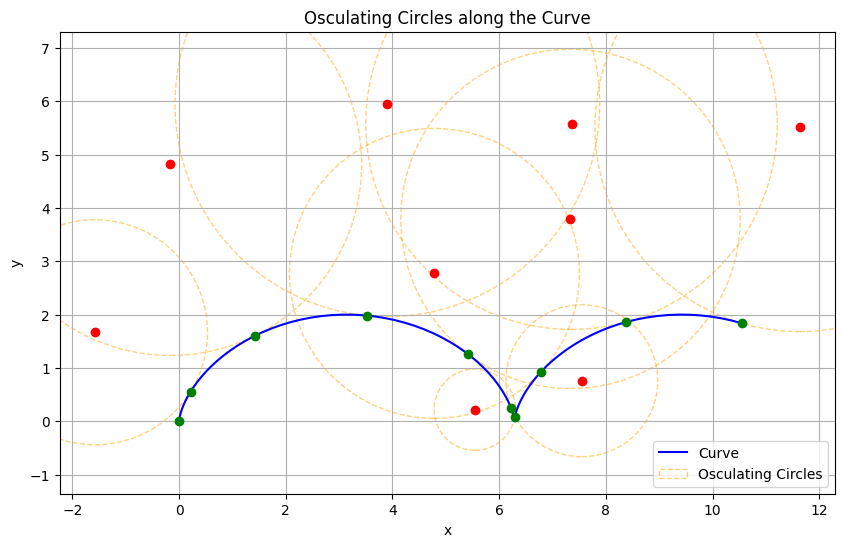

In [44]:
# Lambdify for numerical evaluation
x_func = sp.lambdify(t, x, "numpy")
y_func = sp.lambdify(t, y, "numpy")
R_func = sp.lambdify(t, R, "numpy")
N_x_func = sp.lambdify(t, N_x, "numpy")
N_y_func = sp.lambdify(t, N_y, "numpy")

#Intervall [A, B]
A = 0
B = 10
N = 101
n = 10

# Define t range for visualization
t_vals = np.linspace(A, B, N)
x_vals = x_func(t_vals)
y_vals = y_func(t_vals)

# Plot the curve and osculating circles
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Curve (t, t^2)', color='blue')

# Compute and draw osculating circles at a subset of points
for t_val in np.linspace(A, B, m.floor(N/n)):
    # Evaluate x, y, R, and normal vector N(t) at each t_val
    x_t = x_func(t_val)
    y_t = y_func(t_val)
    R_t = R_func(t_val)
    N_x_t = N_x_func(t_val)
    N_y_t = N_y_func(t_val)

    # Calculate the osculating circle center
    T_x = x_t + R_t * N_x_t
    T_y = y_t + R_t * N_y_t

    # Draw osculating circle
    circle = plt.Circle((T_x, T_y), R_t, color='orange', fill=False, linestyle='--', alpha=0.5)
    plt.gca().add_artist(circle)

    # Mark the circle center and the curve point
    plt.plot(x_t, y_t, 'go')  # Curve point
    plt.plot(T_x, T_y, 'ro')  # Osculating circle center

plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend(['Curve', 'Osculating Circles'])
plt.title('Osculating Circles along the Curve')
plt.grid()
plt.show()

<lambdifygenerated-62>:2: RuntimeWarning: invalid value encountered in scalar divide
  return ((1 - cos(t))**2 + sin(t)**2)**1.5/abs((cos(t) - 1)*cos(t) + sin(t)**2)
<lambdifygenerated-63>:2: RuntimeWarning: invalid value encountered in scalar divide
  return -sin(t)/sqrt((1 - cos(t))**2 + sin(t)**2)
<lambdifygenerated-64>:2: RuntimeWarning: invalid value encountered in scalar divide
  return (1 - cos(t))/sqrt((1 - cos(t))**2 + sin(t)**2)
<ipython-input-55-eb3940b66fee>:72: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_on_curve.set_data(x_t, y_t)  # Moving point on curve
<ipython-input-55-eb3940b66fee>:73: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  circle_center.set_data(T_x, T_y)  # Moving center of osculating circle


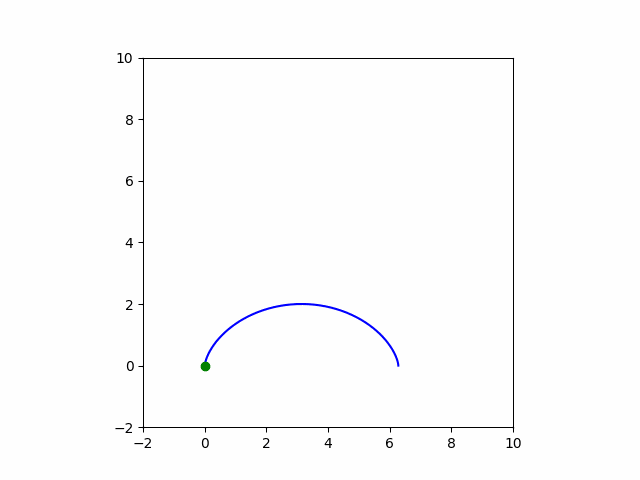

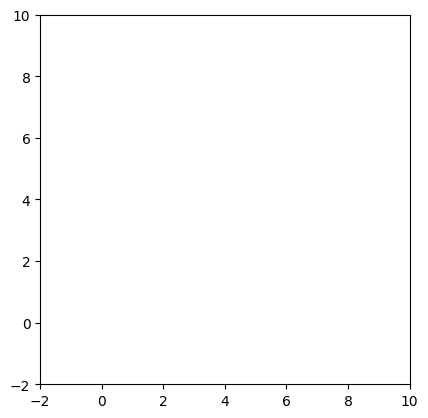

In [55]:
# Define symbolic variable and parametric curve
t = sp.symbols('t')
x = t - sp.sin(t)
y = 1 - sp.cos(t)

# Compute first and second derivatives
x_prime = sp.diff(x, t)
y_prime = sp.diff(y, t)
x_double_prime = sp.diff(x_prime, t)
y_double_prime = sp.diff(y_prime, t)

# Radius of curvature R(t) and normal vector N(t)
numerator_k = sp.Abs(x_prime * y_double_prime - y_prime * x_double_prime)
denominator_k = (x_prime**2 + y_prime**2)**(3/2)
k = numerator_k / denominator_k  # Curvature
R = 1 / k  # Radius of curvature

# Normal vector N(t)
magnitude_X_prime = sp.sqrt(x_prime**2 + y_prime**2)
N_x = -y_prime / magnitude_X_prime
N_y = x_prime / magnitude_X_prime
N = sp.Matrix([N_x, N_y])

# Lambdify for numerical evaluation
x_func = sp.lambdify(t, x, "numpy")
y_func = sp.lambdify(t, y, "numpy")
R_func = sp.lambdify(t, R, "numpy")
N_x_func = sp.lambdify(t, N_x, "numpy")
N_y_func = sp.lambdify(t, N_y, "numpy")

# Define t range for animation
t_vals = np.linspace(0, 2 * np.pi, 200)

# Set up the plot
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-2, 10)
ax.set_ylim(-2, 10)
curve_line, = ax.plot([], [], 'b-', label='Curve (t - sin(t), 1 - cos(t))')
osc_circle = plt.Circle((0, 0), 0, color='orange', fill=False, linestyle='--', alpha=0.5)
ax.add_artist(osc_circle)
point_on_curve, = ax.plot([], [], 'go')  # Moving point on curve
circle_center, = ax.plot([], [], 'ro')  # Osculating circle center

# Initialize plot elements
def init():
    curve_line.set_data([], [])
    osc_circle.set_radius(0)
    point_on_curve.set_data([], [])
    circle_center.set_data([], [])
    return curve_line, osc_circle, point_on_curve, circle_center

# Update function for animation
def update(frame):
    t_val = t_vals[frame]

    # Evaluate x, y, R, and normal vector N(t) at each t_val
    x_t = x_func(t_val)
    y_t = y_func(t_val)
    R_t = R_func(t_val)
    N_x_t = N_x_func(t_val)
    N_y_t = N_y_func(t_val)

    # Calculate osculating circle center
    T_x = x_t + R_t * N_x_t
    T_y = y_t + R_t * N_y_t

    # Update curve, osculating circle, and points
    curve_line.set_data(x_func(t_vals), y_func(t_vals))  # Draw full curve
    osc_circle.set_center((T_x, T_y))
    osc_circle.set_radius(abs(R_t))  # Radius may vary along the curve
    point_on_curve.set_data(x_t, y_t)  # Moving point on curve
    circle_center.set_data(T_x, T_y)  # Moving center of osculating circle

    return curve_line, osc_circle, point_on_curve, circle_center

# Create and save the animation as a GIF
ani = animation.FuncAnimation(fig, update, frames=len(t_vals), init_func=init, blit=False, interval=30)

# Save as GIF
ani.save("osculating_circle_animation.gif", writer="pillow", fps=30)

# Display the GIF in Colab
Image(filename="osculating_circle_animation.gif")


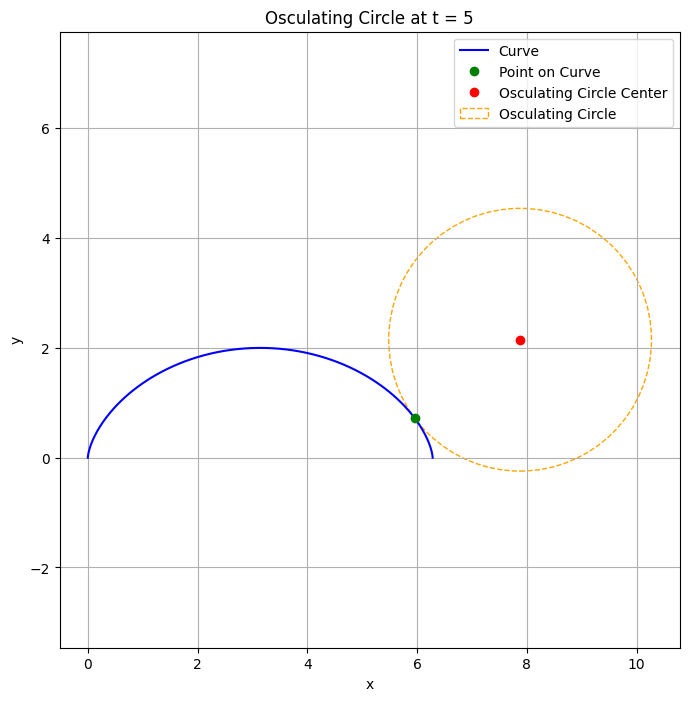

In [57]:

# Define symbolic variable and parametric curve
t = sp.symbols('t')
x = t - sp.sin(t)
y = 1 - sp.cos(t)

# Compute first and second derivatives
x_prime = sp.diff(x, t)
y_prime = sp.diff(y, t)
x_double_prime = sp.diff(x_prime, t)
y_double_prime = sp.diff(y_prime, t)

# Radius of curvature R(t) and normal vector N(t)
numerator_k = sp.Abs(x_prime * y_double_prime - y_prime * x_double_prime)
denominator_k = (x_prime**2 + y_prime**2)**(3/2)
k = numerator_k / denominator_k  # Curvature
R = 1 / k  # Radius of curvature

# Normal vector N(t)
magnitude_X_prime = sp.sqrt(x_prime**2 + y_prime**2)
N_x = -y_prime / magnitude_X_prime
N_y = x_prime / magnitude_X_prime
N = sp.Matrix([N_x, N_y])

# Lambdify for numerical evaluation
x_func = sp.lambdify(t, x, "numpy")
y_func = sp.lambdify(t, y, "numpy")
R_func = sp.lambdify(t, R, "numpy")
N_x_func = sp.lambdify(t, N_x, "numpy")
N_y_func = sp.lambdify(t, N_y, "numpy")

def plot_osculating_circle_at_point(t_val):
    # Evaluate x, y, R, and normal vector N(t) at t_val
    x_t = x_func(t_val)
    y_t = y_func(t_val)
    R_t = R_func(t_val)
    N_x_t = N_x_func(t_val)
    N_y_t = N_y_func(t_val)

    # Calculate osculating circle center
    T_x = x_t + R_t * N_x_t
    T_y = y_t + R_t * N_y_t

    # Plot curve and osculating circle
    t_vals = np.linspace(0, 2 * np.pi, 200)
    plt.figure(figsize=(8, 8))
    plt.plot(x_func(t_vals), y_func(t_vals), 'b-', label='Curve')
    plt.plot(x_t, y_t, 'go', label='Point on Curve')
    plt.plot(T_x, T_y, 'ro', label='Osculating Circle Center')

    # Draw the osculating circle
    circle = plt.Circle((T_x, T_y), abs(R_t), color='orange', fill=False, linestyle='--', label='Osculating Circle')
    plt.gca().add_patch(circle)

    # Plot settings
    plt.axis('equal')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Osculating Circle at t = {t_val}")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
plot_osculating_circle_at_point(5)  # Plot osculating circle at t = 0


/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


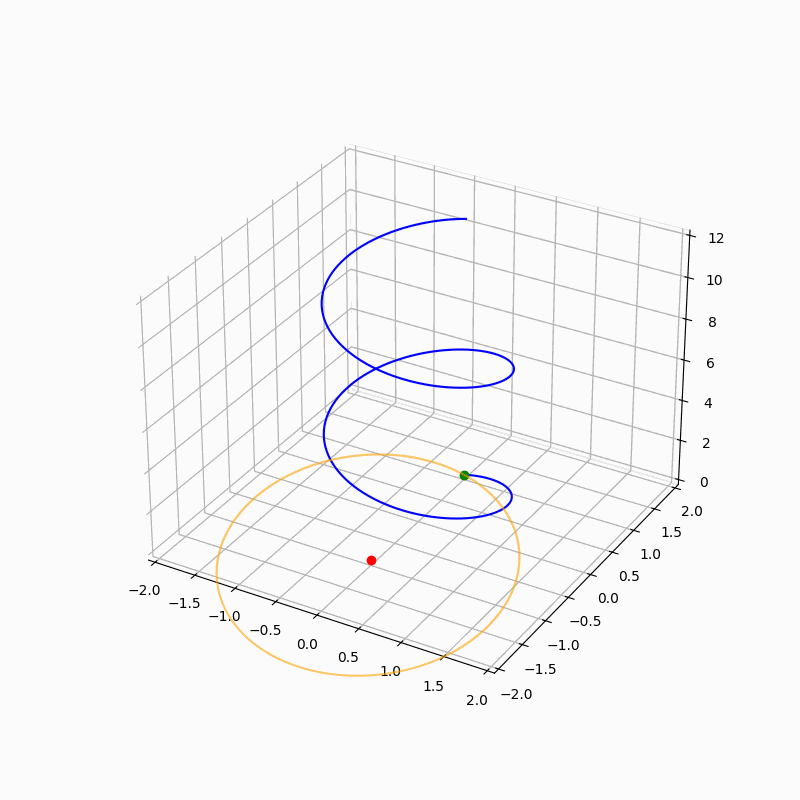

In [59]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from PIL import Image, ImageDraw
import os

# Define symbolic variable and parametric curve
t = sp.symbols('t')
x = sp.sin(t)
y = sp.cos(t)
z = t

# Compute first and second derivatives
x_prime = sp.diff(x, t)
y_prime = sp.diff(y, t)
z_prime = sp.diff(z, t)
x_double_prime = sp.diff(x_prime, t)
y_double_prime = sp.diff(y_prime, t)
z_double_prime = sp.diff(z_prime, t)

# Radius of curvature R(t) and normal vector N(t) in 3D
numerator_k = sp.sqrt((y_double_prime * z_prime - z_double_prime * y_prime)**2 +
                      (z_double_prime * x_prime - x_double_prime * z_prime)**2 +
                      (x_double_prime * y_prime - y_double_prime * x_prime)**2)
denominator_k = (x_prime**2 + y_prime**2 + z_prime**2)**(3/2)
k = numerator_k / denominator_k  # Curvature
R = 1 / k  # Radius of curvature

# Tangent, normal, and binormal vectors T, N, B in 3D
T = sp.Matrix([x_prime, y_prime, z_prime]).normalized()  # Tangent vector
N = sp.Matrix([x_double_prime, y_double_prime, z_double_prime]).normalized()  # Approximate normal
B = T.cross(N)  # Binormal vector

# Lambdify for numerical evaluation
x_func = sp.lambdify(t, x, "numpy")
y_func = sp.lambdify(t, y, "numpy")
z_func = sp.lambdify(t, z, "numpy")
R_func = sp.lambdify(t, R, "numpy")
T_func = sp.lambdify(t, T, "numpy")
N_func = sp.lambdify(t, N, "numpy")
B_func = sp.lambdify(t, B, "numpy")

# Define t range for animation
t_vals = np.linspace(0, 4 * np.pi, 200)

# Folder to save individual frames
os.makedirs("frames", exist_ok=True)

# Generate frames for the animation
for frame, t_val in enumerate(t_vals):
    # Evaluate x, y, z, R, and T/N/B vectors at t_val
    x_t = x_func(t_val)
    y_t = y_func(t_val)
    z_t = z_func(t_val)
    R_t = R_func(t_val)
    T_t = np.array(T_func(t_val)).astype(np.float64).flatten()
    N_t = np.array(N_func(t_val)).astype(np.float64).flatten()
    B_t = np.array(B_func(t_val)).astype(np.float64).flatten()

    # Calculate osculating circle center
    T_x = x_t + R_t * N_t[0]
    T_y = y_t + R_t * N_t[1]
    T_z = z_t + R_t * N_t[2]

    # Plot 3D curve and osculating circle
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(0, 12)

    # Draw the full curve
    ax.plot(x_func(t_vals), y_func(t_vals), z_func(t_vals), 'b-', label='Curve')

    # Plot point on curve and center of osculating circle
    ax.plot([x_t], [y_t], [z_t], 'go')  # Moving point on curve
    ax.plot([T_x], [T_y], [T_z], 'ro')  # Center of osculating circle

    # Generate points for osculating circle in 3D plane spanned by N and B
    theta = np.linspace(0, 2 * np.pi, 100)
    circle_points = np.array([
        T_x + R_t * (np.cos(theta) * N_t[0] + np.sin(theta) * B_t[0]),
        T_y + R_t * (np.cos(theta) * N_t[1] + np.sin(theta) * B_t[1]),
        T_z + R_t * (np.cos(theta) * N_t[2] + np.sin(theta) * B_t[2])
    ])

    # Draw osculating circle
    ax.plot(circle_points[0], circle_points[1], circle_points[2], color='orange', alpha=0.6)

    # Save the frame
    plt.savefig(f"frames/frame_{frame:03d}.png")
    plt.close()

# Create a GIF from saved frames
frames = [Image.open(f"frames/frame_{i:03d}.png") for i in range(len(t_vals))]
frames[0].save("osculating_circle_animation.gif", format='GIF', append_images=frames[1:],
               save_all=True, duration=30, loop=0)

# Display the GIF in Colab
from IPython.display import Image
Image(filename="osculating_circle_animation.gif")
